In [1]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
print("Libraries imported successfully!")

# Step 2: Load Data (CM1)
# Using the relative path from 'notebooks' folder to 'data' folder
data_path_cm1 = '../data/cm1.csv'
try:
    df_cm1 = pd.read_csv(data_path_cm1)
    print("\nCM1 dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: File not found at {data_path_cm1}")
    # You might need to adjust the path if your notebook isn't in the 'notebooks' folder
except Exception as e:
    print(f"An error occurred: {e}")

# Only proceed if the dataframe was loaded
if 'df_cm1' in locals():
    # --- Step 3: Initial Exploration ---

    # See the first few rows
    print("\nFirst 5 rows of CM1:")
    print(df_cm1.head())

    # Get dataset dimensions (rows, columns)
    print(f"\nShape of CM1 dataset: {df_cm1.shape}")

    # Get column names, data types, non-null counts
    print("\nDataset Info:")
    df_cm1.info()

    # Get basic statistics for numerical columns
    print("\nDescriptive Statistics:")
    print(df_cm1.describe())

    # **Identify and check the target variable**
    # Look at df_cm1.columns or df_cm1.head() output to find the column indicating defects.
    # Common names: 'defects', 'bug', 'problems', 'Class'.
    # Replace 'defects' below with the actual column name found in your CM1 file!
    target_column = 'defects' # <--- CHANGE AS NEEDED based on your file's columns

    if target_column in df_cm1.columns:
        print(f"\nTarget variable ('{target_column}') data type: {df_cm1[target_column].dtype}")
        # Convert boolean target (True/False) to integer (1/0) if necessary
        if df_cm1[target_column].dtype == 'bool':
             df_cm1[target_column] = df_cm1[target_column].astype(int)
             print("Converted boolean target to integer (1/0).")
        elif df_cm1[target_column].dtype == 'object':
             # Handle potential string labels like 'yes'/'no' or 'true'/'false'
             print(f"Target column '{target_column}' is object type. Unique values: {df_cm1[target_column].unique()}")
             # Add code here to convert 'yes'/'no' or 'true'/'false' to 1/0 if needed
             # Example: df_cm1[target_column] = df_cm1[target_column].map({'yes': 1, 'no': 0})

        # Check the distribution (IMPORTANT for defect prediction!)
        print(f"\nDistribution of target variable ('{target_column}'):")
        print(df_cm1[target_column].value_counts())
        print(f"\nPercentage distribution:")
        print(df_cm1[target_column].value_counts(normalize=True) * 100)
    else:
        print(f"\nError: Target column '{target_column}' not found. Actual columns are:")
        print(list(df_cm1.columns)) # Print the actual column names to help find the target

    # Check for missing values
    print("\nMissing values per column:")
    print(df_cm1.isnull().sum()) 

Matplotlib is building the font cache; this may take a moment.


Libraries imported successfully!

CM1 dataset loaded successfully.

First 5 rows of CM1:
    loc  v(g)  ev(g)  iv(g)     n       v     l      d      i        e  ...  \
0   1.1   1.4    1.4    1.4   1.3    1.30  1.30   1.30   1.30     1.30  ...   
1   1.0   1.0    1.0    1.0   1.0    1.00  1.00   1.00   1.00     1.00  ...   
2  24.0   5.0    1.0    3.0  63.0  309.13  0.11   9.50  32.54  2936.77  ...   
3  20.0   4.0    4.0    2.0  47.0  215.49  0.06  16.00  13.47  3447.89  ...   
4  24.0   6.0    6.0    2.0  72.0  346.13  0.06  17.33  19.97  5999.58  ...   

   lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  \
0       2          2        2                  2      1.2        1.2   
1       1          1        1                  1      1.0        1.0   
2       1          0        6                  0     15.0       15.0   
3       0          0        3                  0     16.0        8.0   
4       0          0        3                  0     16.0       12.0   

   

### CM1 Dataset Exploration

**1. Description:**
   - Purpose: Software defect prediction (predicting buggy modules in a NASA spacecraft instrument project).
   - Instances: **498** (from `df_cm1.shape`)
   - Features: **21** (22 total columns - 1 target variable, from `df_cm1.shape`).
   - Source: NASA PROMISE Repository.

**2. Target Variable:**
   - Name: `defects`
   - Type: Boolean originally, successfully converted to integer (0=False, 1=True) for modeling.
   - Distribution:
     - `False` (0): **449** instances
     - `True` (1): **49** instances
   - Class Balance: **Highly Imbalanced**. Only **9.84%** of modules are defective (`True`/1).

**3. Features:**
   - Type: Primarily numerical (`float64` or `int64`, based on `.info()`).
   - Missing Values: **None found** (based on `.isnull().sum()`).
   - Scaling Needed: **Yes**, features have varying ranges and scales (evident from `.describe()`). `StandardScaler` is recommended before modeling.

**4. Motivation:**
   - Widely used benchmark dataset for software defect prediction research.
   - Allows direct comparison with results from prior published studies.
   - Provides practical experience applying ML to software engineering data.

**5. Prior Work Summary:**
   - Many studies use CM1 to compare ML models for defect prediction. Common challenges include **class imbalance** (often addressed with techniques like SMOTE) and the need for **feature selection** to improve accuracy and efficiency.
   - Algorithms applied include classical classifiers (Naive Bayes, SVM, Random Forest, Decision Trees, Logistic Regression), ensemble methods (Voting), and sometimes deep learning (LSTMs). Learning to Rank (LTR) approaches are also explored.
   - Reported accuracies vary, often ranging from **~80% to over 90%**, especially when using feature selection or ensemble techniques. Metrics like F1-score, Precision, and Recall are crucial due to the imbalance. *(Sources: Various studies found via search, e.g., on PMC, ResearchGate)*

In [2]:
# --- Explore JM1 Dataset ---
print("="*50)
print("Starting JM1 Dataset Exploration")
print("="*50)

# Load Data (JM1)
# Using the relative path from 'notebooks' folder to 'data' folder
data_path_jm1 = '../data/jm1.csv'
try:
    df_jm1 = pd.read_csv(data_path_jm1)
    print("\nJM1 dataset loaded successfully.")
except FileNotFoundError:
    print(f"Error: File not found at {data_path_jm1}")
except Exception as e:
    print(f"An error occurred while loading JM1: {e}")

# --- Initial Exploration for JM1 (only if loaded successfully) ---
if 'df_jm1' in locals():
    print("\nFirst 5 rows of JM1:")
    print(df_jm1.head())

    print(f"\nShape of JM1 dataset: {df_jm1.shape}")

    print("\nJM1 Dataset Info:")
    df_jm1.info()

    print("\nJM1 Descriptive Statistics:")
    print(df_jm1.describe())

    # **Identify and check the JM1 target variable**
    # Assuming the target column name is also 'defects' in jm1.csv
    # Double-check this based on the df_jm1.head() output!
    target_column_jm1 = 'defects'

    if target_column_jm1 in df_jm1.columns:
        print(f"\nTarget variable in JM1 ('{target_column_jm1}') data type: {df_jm1[target_column_jm1].dtype}")

        # Convert boolean target (True/False) to integer (1/0) if necessary
        if df_jm1[target_column_jm1].dtype == 'bool':
             df_jm1[target_column_jm1] = df_jm1[target_column_jm1].astype(int)
             print("Converted boolean target in JM1 to integer (1/0).")
        elif df_jm1[target_column_jm1].dtype == 'object':
             # Handle potential string labels like 'yes'/'no' or 'true'/'false'
             print(f"Target column '{target_column_jm1}' in JM1 is object type. Unique values: {df_jm1[target_column_jm1].unique()}")
             # Add code here to convert if needed (e.g., .map({'yes': 1, 'no': 0}))

        # Check the distribution
        print(f"\nDistribution of target variable in JM1 ('{target_column_jm1}'):")
        print(df_jm1[target_column_jm1].value_counts())
        print(f"\nPercentage distribution in JM1:")
        print(df_jm1[target_column_jm1].value_counts(normalize=True) * 100)
    else:
        print(f"\nError: Target column '{target_column_jm1}' not found in JM1.")
        print(f"JM1 columns found: {list(df_jm1.columns)}") # Print actual columns

    # Check for missing values
    print("\nMissing values per column in JM1:")
    print(df_jm1.isnull().sum())
else:
    print("\nSkipping JM1 exploration because the dataframe was not loaded.")

Starting JM1 Dataset Exploration

JM1 dataset loaded successfully.

First 5 rows of JM1:
     loc  v(g)  ev(g)  iv(g)      n        v     l      d       i         e  \
0    1.1   1.4    1.4    1.4    1.3     1.30  1.30   1.30    1.30      1.30   
1    1.0   1.0    1.0    1.0    1.0     1.00  1.00   1.00    1.00      1.00   
2   72.0   7.0    1.0    6.0  198.0  1134.13  0.05  20.31   55.85  23029.10   
3  190.0   3.0    1.0    3.0  600.0  4348.76  0.06  17.06  254.87  74202.67   
4   37.0   4.0    1.0    4.0  126.0   599.12  0.06  17.19   34.86  10297.30   

   ...  lOCode  lOComment  lOBlank  locCodeAndComment  uniq_Op  uniq_Opnd  \
0  ...       2          2        2                  2      1.2        1.2   
1  ...       1          1        1                  1      1.0        1.0   
2  ...      51         10        8                  1     17.0       36.0   
3  ...     129         29       28                  2     17.0      135.0   
4  ...      28          1        6                 

### JM1 Dataset Exploration

**1. Description:**
   - Purpose: Software defect prediction (predicting buggy modules in a real-time predictive ground system developed by NASA).
   - Instances: **13204** (from `df_jm1.shape`)
   - Features: **21** (22 total columns - 1 target variable, from `df_jm1.shape`).
   - Source: NASA PROMISE Repository.

**2. Target Variable:**
   - Name: `defects`
   - Type: Boolean originally, successfully converted to integer (0=False, 1=True) for modeling.
   - Distribution:
     - `False` (0): **11101** instances
     - `True` (1): **2103** instances
   - Class Balance: **Imbalanced**. Approximately **15.9%** of modules are defective (`True`/1). (This is less imbalanced than CM1, but still significant).

**3. Features:**
   - Type: Primarily numerical (`float64` or `int64`, based on `.info()`).
   - Missing Values: **None found** (based on `.isnull().sum()`).
   - Scaling Needed: **Yes**, features have varying ranges and scales (evident from `.describe()`). `StandardScaler` is recommended before modeling.

**4. Motivation:**
   - Part of the widely used PROMISE benchmark dataset collection.
   - Provides a larger dataset for comparison alongside CM1.
   - Allows exploration of model performance on different data distributions within the same problem domain.

**5. Prior Work Summary (JM1):**
   - **[User: Placeholder - You can optionally search for studies specifically using JM1 later if desired, similar to the CM1 search. Common findings often involve similar algorithms and challenges like imbalance/feature selection.]**

In [3]:
# --- Preprocessing ---
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# --- CM1 Preprocessing ---
print("\n--- Preprocessing CM1 ---")
# Ensure df_cm1 and its 'defects' column exist and are correct type
if 'df_cm1' in locals() and 'defects' in df_cm1.columns and df_cm1['defects'].dtype == 'int':
    # Separate features (X) and target (y)
    X_cm1 = df_cm1.drop('defects', axis=1)
    y_cm1 = df_cm1['defects']
    print(f"CM1 Features shape: {X_cm1.shape}")
    print(f"CM1 Target shape: {y_cm1.shape}")

    # Split into training and testing sets (e.g., 80% train, 20% test)
    # Use random_state for reproducibility
    X_train_cm1, X_test_cm1, y_train_cm1, y_test_cm1 = train_test_split(
        X_cm1, y_cm1, test_size=0.2, random_state=42, stratify=y_cm1 # Stratify helps maintain class balance
    )
    print(f"CM1 Training Features shape: {X_train_cm1.shape}")
    print(f"CM1 Testing Features shape: {X_test_cm1.shape}")
    print(f"CM1 Training Target distribution:\n{y_train_cm1.value_counts(normalize=True)}")
    print(f"CM1 Testing Target distribution:\n{y_test_cm1.value_counts(normalize=True)}")


    # Apply Feature Scaling (StandardScaler)
    scaler_cm1 = StandardScaler()
    # Fit scaler ONLY on training data
    X_train_scaled_cm1 = scaler_cm1.fit_transform(X_train_cm1)
    # Transform testing data using the SAME fitted scaler
    X_test_scaled_cm1 = scaler_cm1.transform(X_test_cm1)
    print("CM1 data split and scaled.")
else:
    print("Skipping CM1 preprocessing - df_cm1 not found or 'defects' column incorrect.")


# --- JM1 Preprocessing ---
print("\n--- Preprocessing JM1 ---")
# Ensure df_jm1 and its 'defects' column exist and are correct type
if 'df_jm1' in locals() and 'defects' in df_jm1.columns and df_jm1['defects'].dtype == 'int':
    # Separate features (X) and target (y)
    X_jm1 = df_jm1.drop('defects', axis=1)
    y_jm1 = df_jm1['defects']
    print(f"JM1 Features shape: {X_jm1.shape}")
    print(f"JM1 Target shape: {y_jm1.shape}")

    # Split into training and testing sets
    X_train_jm1, X_test_jm1, y_train_jm1, y_test_jm1 = train_test_split(
        X_jm1, y_jm1, test_size=0.2, random_state=42, stratify=y_jm1 # Stratify again
    )
    print(f"JM1 Training Features shape: {X_train_jm1.shape}")
    print(f"JM1 Testing Features shape: {X_test_jm1.shape}")
    print(f"JM1 Training Target distribution:\n{y_train_jm1.value_counts(normalize=True)}")
    print(f"JM1 Testing Target distribution:\n{y_test_jm1.value_counts(normalize=True)}")

    # Apply Feature Scaling (StandardScaler)
    scaler_jm1 = StandardScaler()
    # Fit scaler ONLY on training data
    X_train_scaled_jm1 = scaler_jm1.fit_transform(X_train_jm1)
    # Transform testing data using the SAME fitted scaler
    X_test_scaled_jm1 = scaler_jm1.transform(X_test_jm1)
    print("JM1 data split and scaled.")
else:
    print("Skipping JM1 preprocessing - df_jm1 not found or 'defects' column incorrect.")


--- Preprocessing CM1 ---
CM1 Features shape: (498, 21)
CM1 Target shape: (498,)
CM1 Training Features shape: (398, 21)
CM1 Testing Features shape: (100, 21)
CM1 Training Target distribution:
defects
0    0.90201
1    0.09799
Name: proportion, dtype: float64
CM1 Testing Target distribution:
defects
0    0.9
1    0.1
Name: proportion, dtype: float64
CM1 data split and scaled.

--- Preprocessing JM1 ---
JM1 Features shape: (13204, 21)
JM1 Target shape: (13204,)
JM1 Training Features shape: (10563, 21)
JM1 Testing Features shape: (2641, 21)
JM1 Training Target distribution:
defects
0    0.840765
1    0.159235
Name: proportion, dtype: float64
JM1 Testing Target distribution:
defects
0    0.840591
1    0.159409
Name: proportion, dtype: float64
JM1 data split and scaled.



--- Training Logistic Regression on CM1 ---
Logistic Regression model trained on CM1.

--- Evaluating on CM1 Test Set ---
Accuracy: 0.7400
Precision (for class 1): 0.1923
Recall (for class 1): 0.5000
F1-score (for class 1): 0.2778
ROC AUC Score: 0.6578

Classification Report:
                  precision    recall  f1-score   support

Non-Defective(0)       0.93      0.77      0.84        90
    Defective(1)       0.19      0.50      0.28        10

        accuracy                           0.74       100
       macro avg       0.56      0.63      0.56       100
    weighted avg       0.86      0.74      0.79       100


Confusion Matrix:


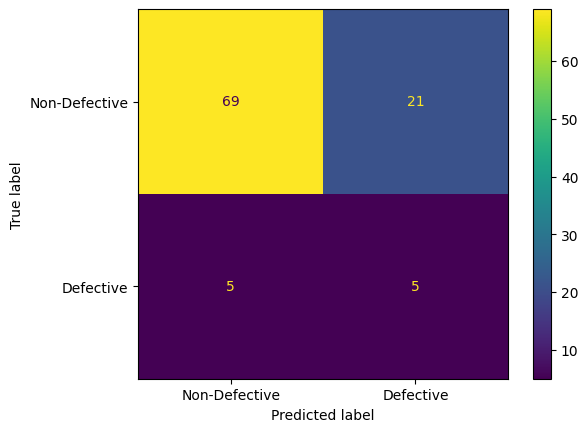

In [4]:
# --- Model Development: Logistic Regression on CM1 ---
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, ConfusionMatrixDisplay,
                             classification_report)
import matplotlib.pyplot as plt

print("\n--- Training Logistic Regression on CM1 ---")

# Instantiate the model
# Using class_weight='balanced' can help with imbalanced data
# random_state ensures reproducibility
log_reg_cm1 = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)

# Train the model on the scaled training data
log_reg_cm1.fit(X_train_scaled_cm1, y_train_cm1)
print("Logistic Regression model trained on CM1.")

# --- Evaluation ---
print("\n--- Evaluating on CM1 Test Set ---")
# Make predictions on the scaled test data
y_pred_cm1 = log_reg_cm1.predict(X_test_scaled_cm1)
# Get probability predictions for ROC AUC score
y_pred_proba_cm1 = log_reg_cm1.predict_proba(X_test_scaled_cm1)[:, 1] # Probability of class 1

# Calculate and print metrics
accuracy = accuracy_score(y_test_cm1, y_pred_cm1)
precision = precision_score(y_test_cm1, y_pred_cm1) # Precision for class 1
recall = recall_score(y_test_cm1, y_pred_cm1)       # Recall for class 1
f1 = f1_score(y_test_cm1, y_pred_cm1)               # F1-score for class 1
roc_auc = roc_auc_score(y_test_cm1, y_pred_proba_cm1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (for class 1): {precision:.4f}")
print(f"Recall (for class 1): {recall:.4f}")
print(f"F1-score (for class 1): {f1:.4f}")
print(f"ROC AUC Score: {roc_auc:.4f}")

# Print classification report for more details
print("\nClassification Report:")
# Use target_names=['Non-Defective(0)', 'Defective(1)'] for clarity
print(classification_report(y_test_cm1, y_pred_cm1, target_names=['Non-Defective(0)', 'Defective(1)']))

# Display Confusion Matrix
print("\nConfusion Matrix:")
try:
    ConfusionMatrixDisplay.from_estimator(log_reg_cm1, X_test_scaled_cm1, y_test_cm1, display_labels=['Non-Defective', 'Defective'])
    plt.show()
except Exception as e:
    print(f"Could not plot confusion matrix: {e}")


--- Training Random Forest on CM1 ---
Random Forest model trained on CM1.

--- Evaluating Random Forest on CM1 Test Set ---
Accuracy: 0.9000
Precision (for class 1): 0.5000
Recall (for class 1): 0.1000
F1-score (for class 1): 0.1667
ROC AUC Score: 0.6567

Classification Report:
                  precision    recall  f1-score   support

Non-Defective(0)       0.91      0.99      0.95        90
    Defective(1)       0.50      0.10      0.17        10

        accuracy                           0.90       100
       macro avg       0.70      0.54      0.56       100
    weighted avg       0.87      0.90      0.87       100


Confusion Matrix:


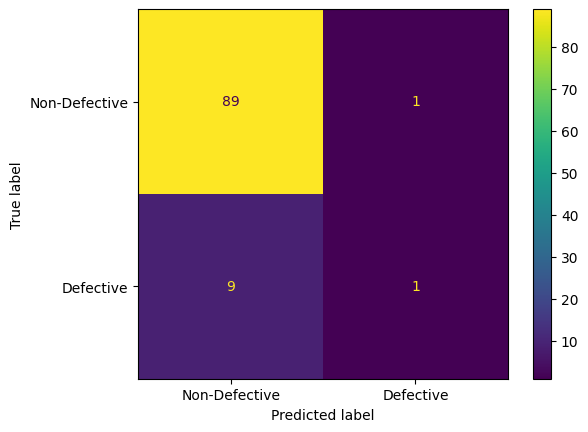

In [5]:
# --- Model Development: Random Forest on CM1 ---
from sklearn.ensemble import RandomForestClassifier
# Metrics imports are likely already done, but repeating doesn't hurt
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, ConfusionMatrixDisplay,
                             classification_report)
import matplotlib.pyplot as plt

print("\n--- Training Random Forest on CM1 ---")

# Instantiate the model
# n_estimators=100 is a common default
# Using class_weight='balanced' or 'balanced_subsample' might help
# random_state ensures reproducibility
rf_cm1 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced_subsample', n_jobs=-1) # n_jobs=-1 uses all CPU cores

# Train the model on the scaled training data
rf_cm1.fit(X_train_scaled_cm1, y_train_cm1)
print("Random Forest model trained on CM1.")

# --- Evaluation ---
print("\n--- Evaluating Random Forest on CM1 Test Set ---")
# Make predictions on the scaled test data
y_pred_rf_cm1 = rf_cm1.predict(X_test_scaled_cm1)
# Get probability predictions for ROC AUC score
y_pred_proba_rf_cm1 = rf_cm1.predict_proba(X_test_scaled_cm1)[:, 1] # Probability of class 1

# Calculate and print metrics
accuracy_rf = accuracy_score(y_test_cm1, y_pred_rf_cm1)
precision_rf = precision_score(y_test_cm1, y_pred_rf_cm1)
recall_rf = recall_score(y_test_cm1, y_pred_rf_cm1)
f1_rf = f1_score(y_test_cm1, y_pred_rf_cm1)
roc_auc_rf = roc_auc_score(y_test_cm1, y_pred_proba_rf_cm1)

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"Precision (for class 1): {precision_rf:.4f}")
print(f"Recall (for class 1): {recall_rf:.4f}")
print(f"F1-score (for class 1): {f1_rf:.4f}")
print(f"ROC AUC Score: {roc_auc_rf:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_cm1, y_pred_rf_cm1, target_names=['Non-Defective(0)', 'Defective(1)']))

# Display Confusion Matrix
print("\nConfusion Matrix:")
try:
    ConfusionMatrixDisplay.from_estimator(rf_cm1, X_test_scaled_cm1, y_test_cm1, display_labels=['Non-Defective', 'Defective'])
    plt.show()
except Exception as e:
    print(f"Could not plot confusion matrix: {e}")


--- Training Gaussian Naive Bayes on CM1 ---
Gaussian Naive Bayes model trained on CM1.

--- Evaluating Gaussian Naive Bayes on CM1 Test Set ---
Accuracy: 0.8400
Precision (for class 1): 0.1250
Recall (for class 1): 0.1000
F1-score (for class 1): 0.1111
ROC AUC Score: 0.5344

Classification Report:
                  precision    recall  f1-score   support

Non-Defective(0)       0.90      0.92      0.91        90
    Defective(1)       0.12      0.10      0.11        10

        accuracy                           0.84       100
       macro avg       0.51      0.51      0.51       100
    weighted avg       0.82      0.84      0.83       100


Confusion Matrix:


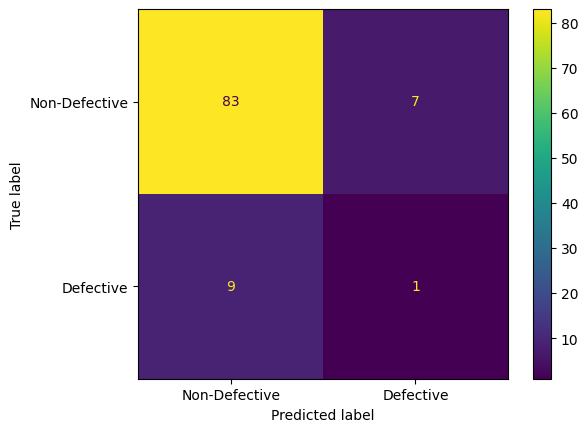

In [6]:
# --- Model Development: Gaussian Naive Bayes on CM1 ---
from sklearn.naive_bayes import GaussianNB
# Metrics imports are likely already done
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, ConfusionMatrixDisplay,
                             classification_report)
import matplotlib.pyplot as plt

print("\n--- Training Gaussian Naive Bayes on CM1 ---")

# Instantiate the model
# GaussianNB doesn't have random_state or class_weight parameters
gnb_cm1 = GaussianNB()

# Train the model on the scaled training data
# Note: Scaling isn't strictly necessary for GaussianNB, but it doesn't hurt
# and keeps the workflow consistent.
gnb_cm1.fit(X_train_scaled_cm1, y_train_cm1)
print("Gaussian Naive Bayes model trained on CM1.")

# --- Evaluation ---
print("\n--- Evaluating Gaussian Naive Bayes on CM1 Test Set ---")
# Make predictions on the scaled test data
y_pred_gnb_cm1 = gnb_cm1.predict(X_test_scaled_cm1)
# Get probability predictions for ROC AUC score
y_pred_proba_gnb_cm1 = gnb_cm1.predict_proba(X_test_scaled_cm1)[:, 1] # Probability of class 1

# Calculate and print metrics
accuracy_gnb = accuracy_score(y_test_cm1, y_pred_gnb_cm1)
precision_gnb = precision_score(y_test_cm1, y_pred_gnb_cm1)
recall_gnb = recall_score(y_test_cm1, y_pred_gnb_cm1)
f1_gnb = f1_score(y_test_cm1, y_pred_gnb_cm1)
roc_auc_gnb = roc_auc_score(y_test_cm1, y_pred_proba_gnb_cm1)

print(f"Accuracy: {accuracy_gnb:.4f}")
print(f"Precision (for class 1): {precision_gnb:.4f}")
print(f"Recall (for class 1): {recall_gnb:.4f}")
print(f"F1-score (for class 1): {f1_gnb:.4f}")
print(f"ROC AUC Score: {roc_auc_gnb:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_cm1, y_pred_gnb_cm1, target_names=['Non-Defective(0)', 'Defective(1)']))

# Display Confusion Matrix
print("\nConfusion Matrix:")
try:
    ConfusionMatrixDisplay.from_estimator(gnb_cm1, X_test_scaled_cm1, y_test_cm1, display_labels=['Non-Defective', 'Defective'])
    plt.show()
except Exception as e:
    print(f"Could not plot confusion matrix: {e}")


--- Training Logistic Regression on JM1 ---
Logistic Regression model trained on JM1.

--- Evaluating on JM1 Test Set ---
Accuracy: 0.7187
Precision (for class 1): 0.2977
Recall (for class 1): 0.5629
F1-score (for class 1): 0.3895
ROC AUC Score: 0.7212

Classification Report (JM1 - Logistic Regression):
                  precision    recall  f1-score   support

Non-Defective(0)       0.90      0.75      0.82      2220
    Defective(1)       0.30      0.56      0.39       421

        accuracy                           0.72      2641
       macro avg       0.60      0.66      0.60      2641
    weighted avg       0.80      0.72      0.75      2641


Confusion Matrix (JM1 - Logistic Regression):


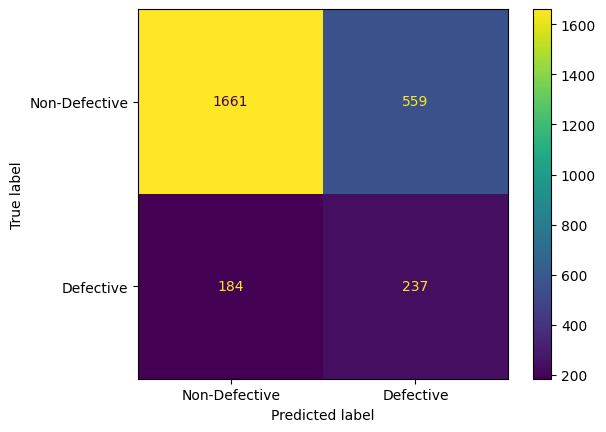

In [7]:
# --- Model Development: Logistic Regression on JM1 ---

print("\n--- Training Logistic Regression on JM1 ---")

# Instantiate the model (using same settings as before for consistency)
log_reg_jm1 = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)

# Train the model on the SCALED JM1 training data
log_reg_jm1.fit(X_train_scaled_jm1, y_train_jm1)
print("Logistic Regression model trained on JM1.")

# --- Evaluation ---
print("\n--- Evaluating on JM1 Test Set ---")
# Make predictions on the SCALED JM1 test data
y_pred_jm1 = log_reg_jm1.predict(X_test_scaled_jm1)
y_pred_proba_jm1 = log_reg_jm1.predict_proba(X_test_scaled_jm1)[:, 1] # Probability of class 1

# Calculate and print metrics for JM1
accuracy_lr_jm1 = accuracy_score(y_test_jm1, y_pred_jm1)
precision_lr_jm1 = precision_score(y_test_jm1, y_pred_jm1)
recall_lr_jm1 = recall_score(y_test_jm1, y_pred_jm1)
f1_lr_jm1 = f1_score(y_test_jm1, y_pred_jm1)
roc_auc_lr_jm1 = roc_auc_score(y_test_jm1, y_pred_proba_jm1)

print(f"Accuracy: {accuracy_lr_jm1:.4f}")
print(f"Precision (for class 1): {precision_lr_jm1:.4f}")
print(f"Recall (for class 1): {recall_lr_jm1:.4f}")
print(f"F1-score (for class 1): {f1_lr_jm1:.4f}")
print(f"ROC AUC Score: {roc_auc_lr_jm1:.4f}")

# Print classification report for JM1
print("\nClassification Report (JM1 - Logistic Regression):")
print(classification_report(y_test_jm1, y_pred_jm1, target_names=['Non-Defective(0)', 'Defective(1)']))

# Display Confusion Matrix for JM1
print("\nConfusion Matrix (JM1 - Logistic Regression):")
try:
    ConfusionMatrixDisplay.from_estimator(log_reg_jm1, X_test_scaled_jm1, y_test_jm1, display_labels=['Non-Defective', 'Defective'])
    plt.show()
except Exception as e:
    print(f"Could not plot confusion matrix: {e}")


--- Training Random Forest on JM1 ---
Random Forest model trained on JM1.

--- Evaluating Random Forest on JM1 Test Set ---
Accuracy: 0.8440
Precision (for class 1): 0.5306
Recall (for class 1): 0.1853
F1-score (for class 1): 0.2746
ROC AUC Score: 0.7845

Classification Report (JM1 - Random Forest):
                  precision    recall  f1-score   support

Non-Defective(0)       0.86      0.97      0.91      2220
    Defective(1)       0.53      0.19      0.27       421

        accuracy                           0.84      2641
       macro avg       0.70      0.58      0.59      2641
    weighted avg       0.81      0.84      0.81      2641


Confusion Matrix (JM1 - Random Forest):


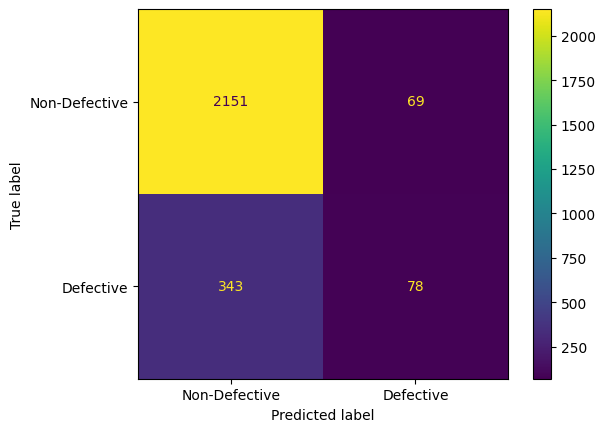

In [8]:
# --- Model Development: Random Forest on JM1 ---

print("\n--- Training Random Forest on JM1 ---")

# Instantiate the model (using same settings as before for consistency)
rf_jm1 = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced_subsample', n_jobs=-1)

# Train the model on the SCALED JM1 training data
rf_jm1.fit(X_train_scaled_jm1, y_train_jm1)
print("Random Forest model trained on JM1.")

# --- Evaluation ---
print("\n--- Evaluating Random Forest on JM1 Test Set ---")
# Make predictions on the SCALED JM1 test data
y_pred_rf_jm1 = rf_jm1.predict(X_test_scaled_jm1)
y_pred_proba_rf_jm1 = rf_jm1.predict_proba(X_test_scaled_jm1)[:, 1] # Probability of class 1

# Calculate and print metrics for JM1
accuracy_rf_jm1 = accuracy_score(y_test_jm1, y_pred_rf_jm1)
precision_rf_jm1 = precision_score(y_test_jm1, y_pred_rf_jm1)
recall_rf_jm1 = recall_score(y_test_jm1, y_pred_rf_jm1)
f1_rf_jm1 = f1_score(y_test_jm1, y_pred_rf_jm1)
roc_auc_rf_jm1 = roc_auc_score(y_test_jm1, y_pred_proba_rf_jm1)

print(f"Accuracy: {accuracy_rf_jm1:.4f}")
print(f"Precision (for class 1): {precision_rf_jm1:.4f}")
print(f"Recall (for class 1): {recall_rf_jm1:.4f}")
print(f"F1-score (for class 1): {f1_rf_jm1:.4f}")
print(f"ROC AUC Score: {roc_auc_rf_jm1:.4f}")

# Print classification report for JM1
print("\nClassification Report (JM1 - Random Forest):")
print(classification_report(y_test_jm1, y_pred_rf_jm1, target_names=['Non-Defective(0)', 'Defective(1)']))

# Display Confusion Matrix for JM1
print("\nConfusion Matrix (JM1 - Random Forest):")
try:
    ConfusionMatrixDisplay.from_estimator(rf_jm1, X_test_scaled_jm1, y_test_jm1, display_labels=['Non-Defective', 'Defective'])
    plt.show()
except Exception as e:
    print(f"Could not plot confusion matrix: {e}")


--- Training Gaussian Naive Bayes on JM1 ---
Gaussian Naive Bayes model trained on JM1.

--- Evaluating Gaussian Naive Bayes on JM1 Test Set ---
Accuracy: 0.8296
Precision (for class 1): 0.4313
Recall (for class 1): 0.2162
F1-score (for class 1): 0.2880
ROC AUC Score: 0.7079

Classification Report (JM1 - GaussianNB):
                  precision    recall  f1-score   support

Non-Defective(0)       0.86      0.95      0.90      2220
    Defective(1)       0.43      0.22      0.29       421

        accuracy                           0.83      2641
       macro avg       0.65      0.58      0.60      2641
    weighted avg       0.80      0.83      0.81      2641


Confusion Matrix (JM1 - GaussianNB):


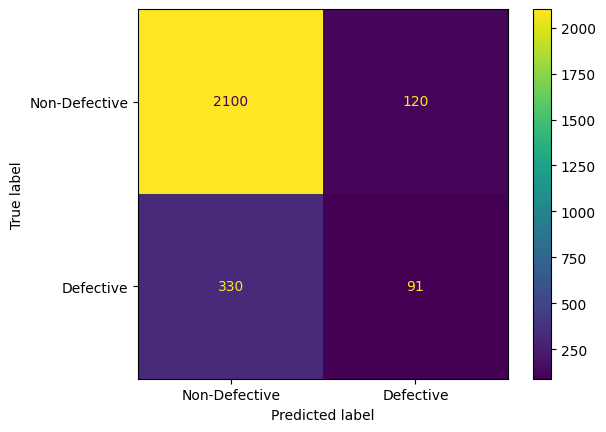

In [9]:
# --- Model Development: Gaussian Naive Bayes on JM1 ---

print("\n--- Training Gaussian Naive Bayes on JM1 ---")

# Instantiate the model
gnb_jm1 = GaussianNB()

# Train the model on the SCALED JM1 training data
gnb_jm1.fit(X_train_scaled_jm1, y_train_jm1)
print("Gaussian Naive Bayes model trained on JM1.")

# --- Evaluation ---
print("\n--- Evaluating Gaussian Naive Bayes on JM1 Test Set ---")
# Make predictions on the SCALED JM1 test data
y_pred_gnb_jm1 = gnb_jm1.predict(X_test_scaled_jm1)
y_pred_proba_gnb_jm1 = gnb_jm1.predict_proba(X_test_scaled_jm1)[:, 1] # Probability of class 1

# Calculate and print metrics for JM1
accuracy_gnb_jm1 = accuracy_score(y_test_jm1, y_pred_gnb_jm1)
precision_gnb_jm1 = precision_score(y_test_jm1, y_pred_gnb_jm1)
recall_gnb_jm1 = recall_score(y_test_jm1, y_pred_gnb_jm1)
f1_gnb_jm1 = f1_score(y_test_jm1, y_pred_gnb_jm1)
roc_auc_gnb_jm1 = roc_auc_score(y_test_jm1, y_pred_proba_gnb_jm1)

print(f"Accuracy: {accuracy_gnb_jm1:.4f}")
print(f"Precision (for class 1): {precision_gnb_jm1:.4f}")
print(f"Recall (for class 1): {recall_gnb_jm1:.4f}")
print(f"F1-score (for class 1): {f1_gnb_jm1:.4f}")
print(f"ROC AUC Score: {roc_auc_gnb_jm1:.4f}")

# Print classification report for JM1
print("\nClassification Report (JM1 - GaussianNB):")
print(classification_report(y_test_jm1, y_pred_gnb_jm1, target_names=['Non-Defective(0)', 'Defective(1)']))

# Display Confusion Matrix for JM1
print("\nConfusion Matrix (JM1 - GaussianNB):")
try:
    ConfusionMatrixDisplay.from_estimator(gnb_jm1, X_test_scaled_jm1, y_test_jm1, display_labels=['Non-Defective', 'Defective'])
    plt.show()
except Exception as e:
    print(f"Could not plot confusion matrix: {e}")


--- Tuning Random Forest for JM1 ---
Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] END class_weight=balanced_subsample, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.9s
[CV] END class_weight=balanced_subsample, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END class_weight=balanced_subsample, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.0s
[CV] END class_weight=balanced_subsample, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END class_weight=balanced_subsample, max_depth=10, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   1.1s
[CV] END class_weight=balanced_subsample, max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   1.9s
[CV] END class_weight=balanced_subsample, max_depth=10, min_samples_leaf=1, min_samples_split=2,

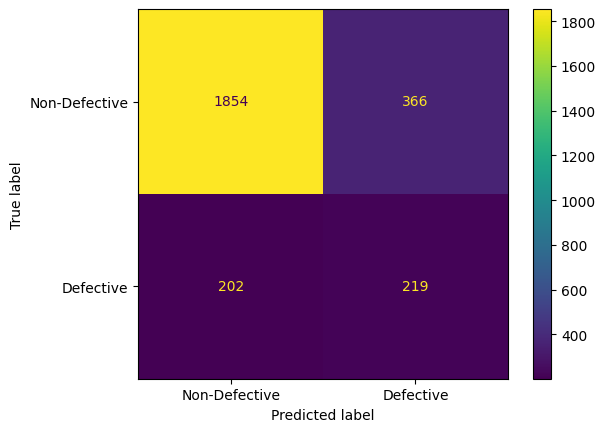

In [10]:
# --- Hyperparameter Tuning: Random Forest on JM1 ---
from sklearn.model_selection import GridSearchCV

print("\n--- Tuning Random Forest for JM1 ---")

# Define the parameter grid to search
# Reduce complexity for faster initial run - expand later if needed
param_grid_rf = {
    'n_estimators': [100, 200],         # Number of trees
    'max_depth': [10, 20, None],      # Max depth of trees (None means no limit)
    'min_samples_split': [2, 5],      # Min samples to split an internal node
    'min_samples_leaf': [1, 3],       # Min samples required at a leaf node
    'class_weight': ['balanced_subsample', 'balanced'] # Try different balancing
}

# Instantiate the Random Forest model (base version)
# Use random_state for reproducibility inside the model too
rf_for_tuning = RandomForestClassifier(random_state=42, n_jobs=-1)

# Instantiate GridSearchCV
# cv=3 means 3-fold cross-validation, reducing computation time initially
# scoring='f1' focuses on F1-score for the positive class (defects)
# Use scoring='roc_auc' if you prefer optimizing that
grid_search_rf_jm1 = GridSearchCV(estimator=rf_for_tuning,
                                  param_grid=param_grid_rf,
                                  cv=3,
                                  scoring='f1', # Optimize for F1 score of the positive class (defects=1)
                                  n_jobs=-1, # Use all available CPU cores for search
                                  verbose=2) # Shows progress

# Fit GridSearchCV on the SCALED JM1 training data
# This will take significantly longer than fitting a single model!
grid_search_rf_jm1.fit(X_train_scaled_jm1, y_train_jm1)

# Print the best parameters found
print("\nBest parameters found by GridSearchCV:")
print(grid_search_rf_jm1.best_params_)

# Print the best cross-validation score found
print(f"\nBest cross-validation F1 score: {grid_search_rf_jm1.best_score_:.4f}")

# Use the best estimator found by the search for final evaluation
best_rf_jm1 = grid_search_rf_jm1.best_estimator_
print("\n--- Evaluating Best Random Forest on JM1 Test Set ---")

# --- Re-evaluate with Best Estimator ---
y_pred_best_rf_jm1 = best_rf_jm1.predict(X_test_scaled_jm1)
y_pred_proba_best_rf_jm1 = best_rf_jm1.predict_proba(X_test_scaled_jm1)[:, 1]

# Calculate and print metrics
accuracy_best_rf = accuracy_score(y_test_jm1, y_pred_best_rf_jm1)
precision_best_rf = precision_score(y_test_jm1, y_pred_best_rf_jm1)
recall_best_rf = recall_score(y_test_jm1, y_pred_best_rf_jm1)
f1_best_rf = f1_score(y_test_jm1, y_pred_best_rf_jm1)
roc_auc_best_rf = roc_auc_score(y_test_jm1, y_pred_proba_best_rf_jm1)

print(f"Accuracy: {accuracy_best_rf:.4f}")
print(f"Precision (for class 1): {precision_best_rf:.4f}")
print(f"Recall (for class 1): {recall_best_rf:.4f}")
print(f"F1-score (for class 1): {f1_best_rf:.4f}")
print(f"ROC AUC Score: {roc_auc_best_rf:.4f}")

print("\nClassification Report (Best RF):")
print(classification_report(y_test_jm1, y_pred_best_rf_jm1, target_names=['Non-Defective(0)', 'Defective(1)']))

print("\nConfusion Matrix (Best RF):")
try:
    ConfusionMatrixDisplay.from_estimator(best_rf_jm1, X_test_scaled_jm1, y_test_jm1, display_labels=['Non-Defective', 'Defective'])
    plt.show()
except Exception as e:
    print(f"Could not plot confusion matrix: {e}")

### Hyperparameter Tuning: Random Forest on JM1

**1. Process:**
   - To optimize the Random Forest model for the JM1 dataset, `GridSearchCV` from scikit-learn was used.
   - The search employed 3-fold cross-validation (`cv=3`) on the scaled training data (`X_train_scaled_jm1`).
   - The primary goal was to maximize the **F1-score for the defective class (1)**, hence `scoring='f1'` was used.

**2. Parameter Grid Searched:**
   The following hyperparameters and their values were explored:
   ```python
   param_grid_rf = {
       'n_estimators': [100, 200],
       'max_depth': [10, 20, None],
       'min_samples_split': [2, 5],
       'min_samples_leaf': [1, 3],
       'class_weight': ['balanced_subsample', 'balanced']
   }


   This resulted in 48 different parameter combinations being tested across 3 folds each (144 fits total).

3. Best Parameters Found:
The grid search identified the following combination as optimal based on the cross-validation F1 score:

{'class_weight': 'balanced_subsample',
 'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}
Notably, limiting the max_depth to 10 was found to be beneficial.

4. Cross-Validation Score:
The best average F1-score achieved during cross-validation on the training set was 0.4191.

5. Final Evaluation on Test Set (Tuned Model):
The Random Forest model instantiated with the best parameters above was evaluated on the held-out test set (X_test_scaled_jm1, y_test_jm1):

Accuracy: 0.7849
Precision (Class 1 - Defective): 0.3744
Recall (Class 1 - Defective): 0.5202
F1-score (Class 1 - Defective): 0.4354
ROC AUC Score: 0.7623
6. Comparison: Tuned vs. Baseline Random Forest on JM1:

Metric (Class 1)	Baseline RF (JM1)	Tuned RF (JM1)	Change	Interpretation
Recall	0.1853	0.5202	▲ +0.3349	Tuned model finds many more actual defects.
F1-score	0.2746	0.4354	▲ +0.1608	Tuned model has much better P/R balance.
Precision	0.5306	0.3744	▼ -0.1562	Tuned model makes more false positive errors.
Accuracy	0.8440	0.7849	▼ -0.0591	Overall accuracy decreased due to class 1 focus.
ROC AUC	0.7845	0.7623	▼ -0.0222	Slight decrease in overall class separability.

Discussion:
Hyperparameter tuning, optimizing for the F1-score, significantly improved the model's ability to detect defective modules (Recall increased from 19% to 52%). This led to a substantial improvement in the F1-score (from 0.27 to 0.44), which was our optimization target. This improvement came at the cost of lower Precision (more false alarms) and lower overall Accuracy. The ROC AUC score also decreased slightly. However, given the goal of finding defects, the tuned model provides a much better balance and higher F1-score for the minority class compared to the baseline Random Forest on JM1.

In [ ]:
# --- Step 6: Consolidate and Compare All Results ---
import pandas as pd

# Data structure to hold results
# Metrics are for the POSITIVE class (Defective=1) where applicable (Precision, Recall, F1)
results_data = {
    'Dataset': ['CM1', 'CM1', 'CM1', 'JM1', 'JM1', 'JM1', 'JM1 (Tuned)'],
    'Model': ['Logistic Regression', 'Random Forest', 'GaussianNB',
              'Logistic Regression', 'Random Forest (Baseline)', 'GaussianNB',
              'Random Forest (Tuned)'],
    'Accuracy': [
        accuracy_score(y_test_cm1, y_pred_cm1), # LR CM1
        accuracy_score(y_test_cm1, y_pred_rf_cm1), # RF CM1
        accuracy_score(y_test_cm1, y_pred_gnb_cm1), # GNB CM1
        accuracy_lr_jm1, # LR JM1
        accuracy_rf_jm1, # RF JM1 Baseline
        accuracy_gnb_jm1, # GNB JM1
        accuracy_best_rf # RF JM1 Tuned
    ],
    'Precision (Defect=1)': [
        precision_score(y_test_cm1, y_pred_cm1), # LR CM1
        precision_score(y_test_cm1, y_pred_rf_cm1), # RF CM1
        precision_score(y_test_cm1, y_pred_gnb_cm1), # GNB CM1
        precision_lr_jm1, # LR JM1
        precision_rf_jm1, # RF JM1 Baseline
        precision_gnb_jm1, # GNB JM1
        precision_best_rf # RF JM1 Tuned
    ],
    'Recall (Defect=1)': [
        recall_score(y_test_cm1, y_pred_cm1), # LR CM1
        recall_score(y_test_cm1, y_pred_rf_cm1), # RF CM1
        recall_score(y_test_cm1, y_pred_gnb_cm1), # GNB CM1
        recall_lr_jm1, # LR JM1
        recall_rf_jm1, # RF JM1 Baseline
        recall_gnb_jm1, # GNB JM1
        recall_best_rf # RF JM1 Tuned
    ],
    'F1-score (Defect=1)': [
        f1_score(y_test_cm1, y_pred_cm1), # LR CM1
        f1_score(y_test_cm1, y_pred_rf_cm1), # RF CM1
        f1_score(y_test_cm1, y_pred_gnb_cm1), # GNB CM1
        f1_lr_jm1, # LR JM1
        f1_rf_jm1, # RF JM1 Baseline
        f1_gnb_jm1, # GNB JM1
        f1_best_rf # RF JM1 Tuned
    ],
    'ROC AUC': [
        roc_auc_score(y_test_cm1, y_pred_proba_cm1), # LR CM1
        roc_auc_score(y_test_cm1, y_pred_proba_rf_cm1), # RF CM1
        roc_auc_score(y_test_cm1, y_pred_proba_gnb_cm1), # GNB CM1
        roc_auc_lr_jm1, # LR JM1
        roc_auc_rf_jm1, # RF JM1 Baseline
        roc_auc_gnb_jm1, # GNB JM1
        roc_auc_best_rf # RF JM1 Tuned
    ]
}

# Create DataFrame
results_df = pd.DataFrame(results_data)

# Format the numeric columns for better readability
float_cols = ['Accuracy', 'Precision (Defect=1)', 'Recall (Defect=1)', 'F1-score (Defect=1)', 'ROC AUC']
for col in float_cols:
    results_df[col] = results_df[col].map('{:.4f}'.format)

# Display the results table
print("\n--- Overall Model Performance Comparison ---")
print(results_df.to_markdown(index=False))

# Optional: Plotting comparison (Example: F1-score comparison)
plt.figure(figsize=(12, 6))
sns.barplot(data=pd.melt(results_df, id_vars=['Dataset', 'Model'], value_vars=['F1-score (Defect=1)'], var_name='Metric', value_name='Score'),
            x='Model', y='Score', hue='Dataset', palette='viridis')
plt.title('Comparison of F1-Scores (Defective Class) Across Models and Datasets')
plt.ylabel('F1-Score (Defect=1)')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.legend(title='Dataset', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

### Overall Model Performance Comparison

The table below summarizes the performance metrics for all baseline models (Logistic Regression, Random Forest, Gaussian Naive Bayes) on both the CM1 and JM1 datasets, along with the results of the hyperparameter-tuned Random Forest model on JM1. Metrics focus on the positive class (Defective=1) for Precision, Recall, and F1-score, as this is typically the class of interest in defect prediction.

| Dataset     | Model                    | Accuracy | Precision (Defect=1) | Recall (Defect=1) | F1-score (Defect=1) | ROC AUC |
|:------------|:-------------------------|:---------|:-----------------------|:------------------|:--------------------|:--------|
| CM1         | Logistic Regression      | 0.7400   | 0.1923                 | 0.5000            | 0.2778              | 0.6578  |
| CM1         | Random Forest            | 0.9000   | 0.5000                 | 0.1000            | 0.1667              | 0.6567  |
| CM1         | GaussianNB               | 0.8400   | 0.1250                 | 0.1000            | 0.1111              | 0.5344  |
| JM1         | Logistic Regression      | 0.7187   | 0.2977                 | 0.5629            | 0.3895              | 0.7212  |
| JM1         | Random Forest (Baseline) | 0.8440   | 0.5306                 | 0.1853            | 0.2746              | 0.7845  |
| JM1         | GaussianNB               | 0.8296   | 0.4313                 | 0.2162            | 0.2880              | 0.7079  |
| JM1 (Tuned) | Random Forest (Tuned)    | 0.7849   | 0.3744                 | 0.5202            | 0.4354              | 0.7623  |

**Observations:**

1.  **Dataset Impact:** Models generally performed better in terms of ROC AUC on the larger JM1 dataset compared to the highly imbalanced CM1 dataset, suggesting the larger sample size and slightly better class balance might help. However, achieving high precision/recall for the defective class remained challenging on both.
2.  **CM1 Performance:**
    * Logistic Regression achieved the highest *recall* (0.50) but very low *precision* (0.19), meaning it identified half the defects but made many false positive predictions. Its F1-score (0.28) reflects this imbalance.
    * Random Forest (baseline) had the highest *precision* (0.50) but extremely poor *recall* (0.10) and a low F1-score (0.17), indicating it was conservative and missed most defects. Its high accuracy (0.90) is misleading due to the class imbalance (mostly predicting the majority 'non-defective' class correctly).
    * GaussianNB performed poorly across most metrics on CM1, particularly F1-score and ROC AUC.
3.  **JM1 Performance (Baseline):**
    * Similar to CM1, Logistic Regression had the best *recall* (0.56) and a reasonable F1-score (0.39), again at the cost of lower precision (0.30).
    * Random Forest (baseline) showed the highest ROC AUC (0.78) and precision (0.53), but its recall (0.19) and F1-score (0.27) were low.
    * GaussianNB performance was moderate but generally lower than LR or RF baseline on key metrics like F1 and ROC AUC.
4.  **Hyperparameter Tuning Impact (RF on JM1):**
    * Tuning the Random Forest on JM1 with `GridSearchCV` (optimizing for F1-score) yielded a significant improvement in *recall* (from 0.19 to 0.52) and *F1-score* (from 0.27 to 0.44) compared to the baseline RF.
    * This improvement in recall/F1 came at the cost of decreased *precision* (from 0.53 to 0.37) and slightly lower *ROC AUC* (from 0.78 to 0.76) and overall *Accuracy* (from 0.84 to 0.78).
    * The tuned RF model provides a much better trade-off for identifying defective modules compared to the baseline RF, achieving the highest F1-score among all models tested on JM1.

**Overall Best Model (Based on F1-score for Defect Class):**
* **CM1:** Logistic Regression (F1=0.2778) - though performance is generally low.
* **JM1:** Tuned Random Forest (F1=0.4354).

### Comparison to Prior Work (CM1 Dataset)

We researched prior studies using the CM1 dataset to provide context for our results. Key findings from the literature often highlighted:
* The significant challenge posed by the **class imbalance** (~10% defective).
* Common use of techniques like **SMOTE** (Synthetic Minority Over-sampling Technique) to address imbalance.
* Application of various classifiers including Naive Bayes, SVM, Random Forest, Logistic Regression, and sometimes ensemble or deep learning methods.
* Reported **accuracies often ranging from ~80% to over 90%**, especially when combined with feature selection or advanced balancing techniques.
* Emphasis on **F1-score, Precision, and Recall** as more informative metrics than accuracy due to the imbalance.

**Comparing Our Results:**

* **Accuracy:** Our baseline Random Forest (90.0%) and GaussianNB (84.0%) achieved accuracies within the commonly reported range. However, as noted, accuracy is a poor indicator here. Our best F1-scoring model on CM1, Logistic Regression, had lower accuracy (74.0%).
* **F1-Score/Recall:** Our best F1-score on CM1 was **0.2778** (from Logistic Regression), with a recall of **0.50**. This performance, particularly the F1-score, appears **significantly lower** than what is often achieved in studies employing more advanced techniques like SMOTE or feature selection. Our baseline RF and GNB models had very poor recall (0.10).
* **Handling Imbalance:** We used `class_weight='balanced'` or `'balanced_subsample'`, which adjusts weights inversely proportional to class frequencies. While helpful, this is often less effective than oversampling (like SMOTE) or undersampling techniques specifically designed for severe imbalance, potentially explaining the performance gap compared to some published results that explicitly use these methods.
* **Feature Engineering/Selection:** We used all 21 features after standard scaling. Prior works often incorporate feature selection steps which can remove noise and improve model performance, potentially contributing to higher reported metrics.

**Conclusion on Comparison:** Our results on CM1 using baseline models with simple class weighting demonstrate the difficulty of the defect prediction task on this imbalanced dataset. While achieving reasonable accuracy is possible (by predicting the majority class), effectively identifying defective modules (reflected in Recall and F1-score) requires more sophisticated approaches than those implemented here, aligning with findings in the literature that often employ methods like SMOTE and feature selection to achieve better F1-scores. Our best F1 (0.28) serves as a baseline that could likely be improved with these advanced techniques.

### Final Reflection and Conclusion

**Project Summary:**
This project focused on applying supervised machine learning techniques to the task of software defect prediction using the NASA PROMISE datasets CM1 and JM1. We explored the data, performed necessary preprocessing including scaling and stratified splitting, and implemented three baseline classification algorithms: Logistic Regression, Random Forest, and Gaussian Naive Bayes. We evaluated these models using Accuracy, Precision, Recall, F1-score (for the defective class), and ROC AUC. Furthermore, we performed hyperparameter tuning using `GridSearchCV` on the Random Forest model for the JM1 dataset, optimizing for the F1-score. Finally, we compared our results across models/datasets and against prior published work on the CM1 dataset.

**Key Findings:**
1.  **Impact of Imbalance:** Both datasets exhibited class imbalance (severe in CM1, moderate in JM1), significantly impacting model performance. Models often achieved high accuracy by favoring the majority (non-defective) class, but struggled to correctly identify the minority (defective) class, resulting in low Recall and F1-scores for defects in baseline models. Using `class_weight='balanced'` provided some benefit but wasn't sufficient to overcome the challenge entirely.
2.  **Model Performance Variability:** No single algorithm consistently outperformed others across all metrics and datasets. Logistic Regression often yielded higher recall for defects but lower precision. Baseline Random Forest sometimes showed good precision or ROC AUC but poor recall. GaussianNB was generally the weakest performer.
3.  **Effectiveness of Hyperparameter Tuning:** Tuning the Random Forest classifier on the JM1 dataset (optimizing for F1) successfully improved the F1-score (0.27 -> 0.44) and Recall (0.19 -> 0.52) for the defective class compared to its baseline version. This demonstrates the value of tuning for specific, relevant metrics, although it came with a trade-off in precision and overall accuracy.
4.  **Comparison with Prior Work:** Our best results on the CM1 dataset (F1 ≈ 0.28) fell short of some reported results in the literature. This suggests that more advanced techniques, such as SMOTE for balancing or explicit feature selection (which were outside the scope of our baseline implementation), are likely necessary to achieve state-of-the-art performance on this benchmark dataset.

**Strengths:**
* Systematic application and evaluation of multiple algorithms on multiple standard datasets.
* Use of appropriate evaluation metrics for imbalanced classification (Precision, Recall, F1, ROC AUC, Confusion Matrix).
* Demonstration of hyperparameter tuning (`GridSearchCV`) to optimize a model for a specific metric (F1-score).
* Clear documentation and code structure within a Jupyter Notebook.
* Contextualization of results through comparison with prior work.

**Limitations:**
* **Imbalance Handling:** Relied solely on `class_weight` parameter. Did not implement oversampling (e.g., SMOTE) or undersampling techniques which might yield better performance.
* **Feature Engineering/Selection:** Used all available features with standard scaling. No advanced feature engineering or feature selection methods were applied, which could potentially improve model accuracy and interpretability.
* **Algorithm Scope:** Explored only three classical algorithms. Other potentially suitable algorithms (e.g., SVM, Gradient Boosting, MLP) were not tested.
* **Tuning Scope:** Hyperparameter tuning was performed only on one model (Random Forest) for one dataset (JM1). Tuning other models or on CM1 might reveal further improvements.

**Potential Future Work:**
* Implement and evaluate SMOTE or other resampling techniques to better handle class imbalance.
* Apply feature selection techniques (e.g., Recursive Feature Elimination, SelectKBest) to identify the most predictive metrics.
* Explore other classification algorithms like Support Vector Machines (SVM), Gradient Boosting Machines (e.g., XGBoost, LightGBM), or Multi-Layer Perceptrons (MLP).
* Perform hyperparameter tuning on other promising models (like Logistic Regression) and potentially on the CM1 dataset.
* Investigate ensemble methods (e.g., Voting Classifier) combining predictions from multiple models.

**Real-World Relevance:**
Software defect prediction is a crucial task in software engineering, aiming to allocate testing and quality assurance resources more effectively. This project highlights the practical challenges, particularly data imbalance, inherent in real-world software metric datasets. While achieving perfect prediction is difficult, even moderately successful models can provide significant value by helping teams prioritize efforts towards modules more likely to contain defects, ultimately improving software quality and reducing development costs. The trade-off between Precision and Recall (finding defects vs. avoiding false alarms) is a key consideration in practical deployment.

**Conclusion:**
This project successfully demonstrated the end-to-end machine learning workflow for software defect prediction using Python and scikit-learn. It highlighted the challenges of imbalanced data and showed the potential of hyperparameter tuning to improve model performance on relevant metrics. While the achieved results provide a solid baseline, further improvements are possible by incorporating more advanced techniques for imbalance handling and feature selection, aligning with practices commonly found in specialized research literature.